# Projeto 1 - Ciência dos Dados

Nome: Isadora Stigliani Dalberto

## Pergunta(s):

Os países que entraram no SADC (Comunidade para o Desenvolvimento da África Austral) em 1992 tiveram um aumento no seu PIB superior aos países da África que não entraram? Além do PIB, a expectativa de vida também aumentou proporcionalmente ao PIB?

**Anos de interesse:**

>de 1971 até 1991 - 20 anos antes de existir o SADC
 
>de 1992 até 2010 - 20 anos após o SADC existir

## Hipótese:

Os países que entraram na SADC tiveram seu PIB elevado pois, por ser uma organização que visa o crescimento econômico dos países participantes, há uma maior exportação e melhoria na economia do país como um todo.** -- OLHAR DENOVO ESSA HIPOTESE!

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import os
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\dorad\OneDrive\Documentos\Insper\2 Semestre\2.CienDados\Projeto1


In [4]:
dados = pd.read_excel('total_gdp_us_inflation_adjusted.xlsx')

In [5]:
dados_indice = dados.set_index("country")

In [6]:
#Países pertencentes ao Bloco SADC (áfrica austral)
af_aus = ["Angola", "South Africa", "Botswana", "Congo, Dem. Rep.", "Lesotho", "Madagascar", "Malawi", "Mauritius", "Mozambique", "Namibia", "Swaziland", "Tanzania", "Zambia", "Zimbabwe"]

In [7]:
#Paises da áfrica que não pertencem ao SADC
af_nao_aus = ["Benin", "Burkina Faso", "Burundi", "Cameroon", "Cape Verde", "Central African Republic", "Chad", "Congo, Rep.", "Djibouti", "Eritrea", "Ethiopia", "Gabon", "Gambia", "Ghana", "Guinea", "Guinea-Bissau", "Liberia", "Mali", "Niger", "Nigeria", "Rwanda", "Senegal", "Seychelles", "Sierra Leone", "Sudan", "Togo", "Uganda" ]

In [8]:
#Lista total de Anos
anos = [1971, 1972,1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012]

In [9]:
#Lista da primeira metade
anos_1 = [1971, 1972,1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991]

In [10]:
#Lista da segunda metade
anos_2 = [1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012]

In [17]:
dados_indice.loc[:, "AF_AUS"] = 0      #criar uma coluna chamada AF_AUS e falar que todos os países são 0
dados_indice.loc[af_aus,"AF_AUS"]=1    #falar que todos os países da lista af_aus recebem o valor de 1 na coluna AF_AUS

dados_indice.loc[:, "AF_NAO_AUS"] = 0     #criar uma coluna chamada AF_NAO_AUS e falar que todos os países são 0
dados_indice.loc[af_nao_aus,"AF_NAO_AUS"]=1   #falar que todos os países da lista af_nao_aus recebem o valor de 1 na coluna AF_NAO_AUS

In [18]:
dados_af_aus = dados_indice.loc[af_aus]
#dados_af_aus      #imprime todos os paises que sao do SADC

dados_af_nao_aus = dados_indice.loc[af_nao_aus]
#dados_af_nao_aus      #imprime todos os paises que sao da africa mas nao sao da SADC

In [19]:
dados_indice.AF_AUS.value_counts()      #conta os paises que sao da SADC

0    176
1     14
Name: AF_AUS, dtype: int64

In [20]:
dados_indice.AF_NAO_AUS.value_counts()       #conta os paises que são da áfrica mas não sao da SADC

0    163
1     27
Name: AF_NAO_AUS, dtype: int64

In [24]:
transpor_nao_aus = dados_af_nao_aus.transpose()
transpor_quant_nao_aus = transpor_nao_aus[:-2]

nao_aus_anos1 = transpor_quant_nao_aus.loc[(transpor_quant_nao_aus.index>1970) & (transpor_quant_nao_aus.index<1992),:].transpose()
soma_nao_aus_anos1 = nao_aus_anos1.sum()

nao_aus_anos2 = transpor_quant_aus.loc[(transpor_quant_nao_aus.index>1991) & (transpor_quant_nao_aus.index<2013),:].transpose()
soma_nao_aus_anos2 = nao_aus_anos2.sum()

nao_aus_anos_total = transpor_quant_aus.loc[(transpor_quant_nao_aus.index>1970) & (transpor_quant_nao_aus.index<2013),:].transpose()
soma_nao_aus_anos_total = nao_aus_anos_total.sum()

soma_nao_aus_total = soma_nao_aus_anos1 + soma_nao_aus_anos2

In [22]:
transpor_aus = dados_af_aus.transpose()
transpor_quant_aus = transpor_aus[:-2]

aus_anos1 = transpor_quant_aus.loc[(transpor_quant_aus.index>1970) & (transpor_quant_aus.index<1992),:].transpose()
soma_aus_anos1 = aus_anos1.sum()

aus_anos2 = transpor_quant_aus.loc[(transpor_quant_aus.index>1991) & (transpor_quant_aus.index<2013),:].transpose()
soma_aus_anos2 = aus_anos2.sum()

aus_anos_total = transpor_quant_aus.loc[(transpor_quant_aus.index>1970) & (transpor_quant_aus.index<2013),:].transpose()
soma_aus_anos_total = aus_anos_total.sum()

soma_aus_total = soma_aus_anos1 + soma_aus_anos2

In [25]:
africa = af_aus + af_nao_aus
dados_africa = dados_indice.loc[africa]

In [26]:
transpor = dados_africa.transpose()
transpor_quant = transpor[:-2]

africa_anos1 = transpor_quant.loc[(transpor_quant.index>1970) & (transpor_quant.index<1992),:].transpose()
soma_africa_anos1 = africa_anos1.sum()

africa_anos2 = transpor_quant.loc[(transpor_quant.index>1991) & (transpor_quant.index<2013),:].transpose()
soma_africa_anos2 = africa_anos2.sum()

africa_anos_total = transpor_quant.loc[(transpor_quant.index>1970) & (transpor_quant.index<2013),:].transpose()
soma_africa_anos_total = africa_anos_total.sum()

soma_africa_total = soma_africa_anos1 + soma_africa_anos2

In [27]:
africa_anos_total.loc[:, "AF_AUS"] = 0
africa_anos_total.loc[af_aus,"AF_AUS"]=1

africa_anos_total.loc[:, "AF_NAO_AUS"] = 0
africa_anos_total.loc[af_nao_aus,"AF_NAO_AUS"]=1

africa_anos_total  #Imprime todos os paises da África no período de tempo selecionado e indica quais
#                   sao da SADC e quais não são

,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,...,2005,2006,2007,2008,2009,2010,2011,2012,AF_AUS,AF_NAO_AUS
country,,,,,,,,,,,,,,,,,,,,,
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.080000e+10,...,4.670000e+10,5.560000e+10,6.840000e+10,7.790000e+10,7.980000e+10,8.250000e+10,8.570000e+10,9.020000e+10,1,0
South Africa,1.440000e+11,1.460000e+11,1.530000e+11,1.620000e+11,1.650000e+11,1.680000e+11,1.680000e+11,1.730000e+11,1.800000e+11,1.920000e+11,...,3.220000e+11,3.400000e+11,3.580000e+11,3.700000e+11,3.640000e+11,3.750000e+11,3.880000e+11,3.960000e+11,1,0
Botswana,5.880000e+08,7.430000e+08,9.020000e+08,9.810000e+08,1.060000e+09,1.180000e+09,1.320000e+09,1.510000e+09,1.690000e+09,1.890000e+09,...,1.020000e+10,1.110000e+10,1.200000e+10,1.280000e+10,1.180000e+10,1.280000e+10,1.360000e+10,1.420000e+10,1,0
"Congo, Dem. Rep.",2.260000e+10,2.270000e+10,2.450000e+10,2.530000e+10,2.400000e+10,2.270000e+10,2.290000e+10,2.170000e+10,2.180000e+10,2.230000e+10,...,1.650000e+10,1.730000e+10,1.840000e+10,1.960000e+10,2.010000e+10,2.160000e+10,2.300000e+10,2.470000e+10,1,0
Lesotho,3.780000e+08,3.770000e+08,4.770000e+08,5.290000e+08,4.570000e+08,5.080000e+08,6.190000e+08,7.320000e+08,7.530000e+08,7.330000e+08,...,1.890000e+09,1.970000e+09,2.060000e+09,2.200000e+09,2.250000e+09,2.390000e+09,2.550000e+09,2.700000e+09,1,0
Madagascar,5.100000e+09,5.040000e+09,4.910000e+09,5.000000e+09,5.070000e+09,4.910000e+09,5.030000e+09,4.890000e+09,5.380000e+09,5.420000e+09,...,7.590000e+09,7.970000e+09,8.470000e+09,9.070000e+09,8.710000e+09,8.730000e+09,8.860000e+09,9.130000e+09,1,0
Malawi,1.600000e+09,1.700000e+09,1.740000e+09,1.870000e+09,1.980000e+09,2.080000e+09,2.180000e+09,2.390000e+09,2.500000e+09,2.510000e+09,...,4.870000e+09,5.100000e+09,5.580000e+09,6.010000e+09,6.510000e+09,6.960000e+09,7.300000e+09,7.440000e+09,1,0
Mauritius,NaN,NaN,NaN,NaN,NaN,2.120000e+09,2.260000e+09,2.350000e+09,2.430000e+09,2.190000e+09,...,7.670000e+09,8.330000e+09,8.800000e+09,9.280000e+09,9.580000e+09,1.000000e+10,1.040000e+10,1.080000e+10,1,0
Mozambique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.260000e+09,...,7.100000e+09,7.790000e+09,8.370000e+09,8.950000e+09,9.520000e+09,1.020000e+10,1.090000e+10,1.170000e+10,1,0


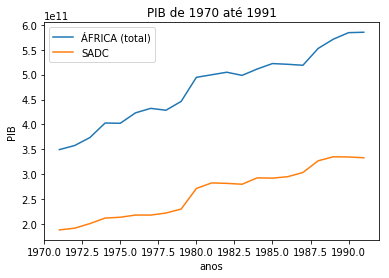

In [28]:
plt.plot(anos_1, soma_africa_anos1, label="ÁFRICA (total)")
plt.plot(anos_1, soma_aus_anos1, label="SADC")
#plt.plot(anos_1, soma_nao_aus_anos1, label="Não SADC")
plt.xlabel("anos")
plt.ylabel("PIB")
plt.title("PIB de 1970 até 1991")
plt.legend()
plt.show()

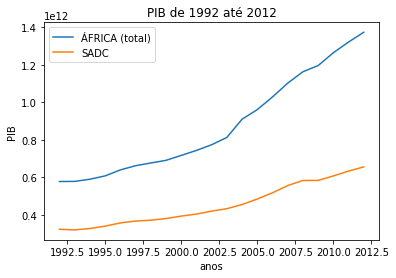

In [29]:
#SOMA AFRICA TOTAL (ANOS 2 + ANOS1) TA DANDO NAN

plt.plot(anos_2, soma_africa_anos2, label="ÁFRICA (total)")
plt.plot(anos_2, soma_aus_anos2, label="SADC")
#plt.plot(anos_2, soma_nao_aus_anos2, label="Não SADC")  # soma_aus e soma_nao_aus tao dando os mesmos valores!
plt.xlabel("anos")
plt.ylabel("PIB")
plt.title("PIB de 1992 até 2012")
plt.legend()
plt.show()

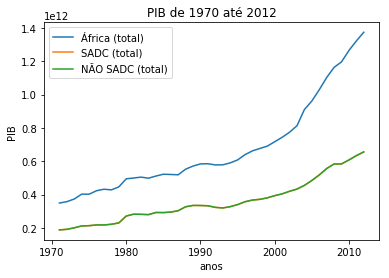

In [30]:
#plt.plot(anos_2, soma_africa_anos2, label="ÁFRICA após (total)") -- com a divisao 
#plt.plot(anos_1, soma_africa_anos1, label="ÁFRICA antes (total)") -- com a divisao
#plt.plot(anos_2, soma_aus_anos2, label="SADC após") -- com a divisao
#plt.plot(anos_1, soma_aus_anos1, label="SADC antes") -- com a divisao
#plt.plot(anos_2, soma_nao_aus_anos2, label="Não SADC após") -- com a divisao
#plt.plot(anos_1, soma_nao_aus_anos1, label="Não SADC antes") -- com a divisao
plt.plot(anos, soma_africa_anos_total, label="África (total)")
plt.plot(anos, soma_aus_anos_total, label="SADC (total)" )
plt.plot(anos, soma_nao_aus_anos_total, label="NÃO SADC (total)")
plt.xlabel("anos")
plt.ylabel("PIB")
plt.title("PIB de 1970 até 2012")
plt.legend()
plt.show()

# ISSO É COMO O GRÁFICO DO TOTAL (CÉLULA DE BAIXO) DEVE PARECER >> fiz o total com o intervalo de tempo maior
# Divisão: entre os dois intervalos de tempo definidos (com uma "falha" no gráfico)-- a falha é intencional!

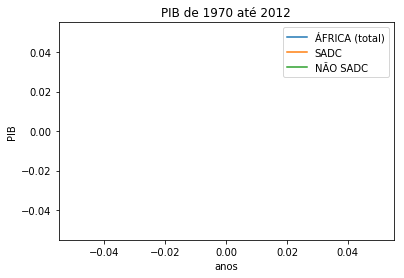

In [31]:
#   CÓDIGO EM CONSTRUÇÃO   

plt.plot(anos, soma_africa_total, label="ÁFRICA (total)")    #somar o PIB de todos paises da áfrica (total)
plt.plot(anos, soma_aus_total, label="SADC")    #somar o PIB todos os paises POR ANO que sao da SADC
plt.plot(anos, soma_nao_aus_total, label="NÃO SADC")     #somar o PIB de todos os paises POR ANO que não sao da SADC
plt.xlabel("anos")
plt.ylabel("PIB")
plt.title("PIB de 1970 até 2012")
plt.legend()
plt.show()

#  O TOTAL TA DANDO NOT A NUMBER (NaN) !!!

In [32]:
dados_af_aus1 = africa_anos1.loc[af_aus]
print('PIB total dos países da SADC de 1971 à 1991')
dados_af_aus1.sum().sum() / 14

PIB total dos países da SADC de 1971 à 1991


394528142857.1429

In [33]:
dados_af_aus2 = africa_anos2.loc[af_aus]
print('PIB total dos países da SADC de 1992 à 2012')
dados_af_aus2.sum().sum() / 14

PIB total dos países da SADC de 1992 à 2012


679862857142.8572

In [34]:
print('Diferença por pais entre os intervalos de tempo dos paises da SADC')
(dados_af_aus2.sum().sum() - dados_af_aus1.sum().sum()) / 14
#FAZER EM PORCENTAGEM !!!! (O AUMENTO PERCENTUAL) -- OU FAZER A MÉDIA DE CADA E O AUMENTO PERCENTUAL DA MÉDIA!!!

Diferença por pais entre os intervalos de tempo dos paises da SADC


285334714285.7143

In [35]:
dados_af_nao_aus1 = africa_anos1.loc[af_nao_aus]
print('PIB total dos países da áfrica que não são da SADC de 1971 à 1991')
dados_af_nao_aus1.sum().sum() / 27

PIB total dos países da áfrica que não são da SADC de 1971 à 1991


165056629629.62964

In [36]:
dados_af_nao_aus2 = africa_anos2.loc[af_nao_aus]
print('PIB total dos países da áfrica que não são da SADC de 1992 à 2012')
dados_af_nao_aus2.sum().sum() / 27

PIB total dos países da áfrica que não são da SADC de 1992 à 2012


328766962962.96295

In [37]:
print('Diferenca por pais entre os intervalos de tempo dos paises da áfrica que nao fazem parte da SADC')
(dados_af_nao_aus2.sum().sum() - dados_af_nao_aus1.sum().sum()) / 27

Diferenca por pais entre os intervalos de tempo dos paises da áfrica que nao fazem parte da SADC


163710333333.33334

In [ ]:
#OBS: O af_nao_aus tem praticamente o dobro de paises que o af_aus! tem que arranjar um jeito de ser proporcional!
# --- fazer a média? (é eficiente?  / o melhor jeito?)

## Conclusão

Responda à pergunta, argumento da melhor forma possível com base nos dados

> A ser respondida de acordo com a progressão do projeto!